# <font color = red>Predicting House Prices in King County, Seattle, Washington 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#plt.style.use('')

In [3]:
df = pd.read_csv("kc_house_data.csv")

### <font color = purple> EDA -Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
abs(df.corr()['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

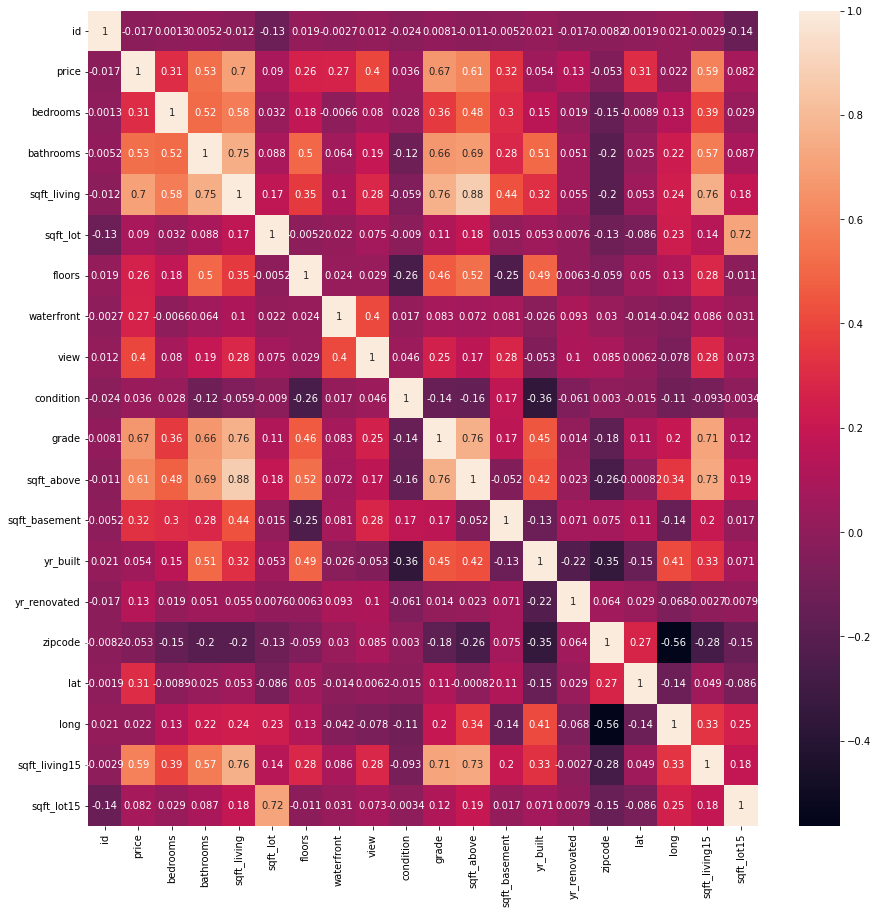

In [9]:
ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(),annot = True);

### <font color = purple>Feature Engineering

In [10]:
df["zipcode"]=df["zipcode"].astype("category")

In [11]:
df=df[df['bedrooms']<10]

In [12]:
df=df[df['bathrooms']<7]

In [13]:
#df["lat"]=df["lat"].astype("category")

In [14]:
df["age"]=2022-df["yr_built"] #evin yaşı hesaplanarak yeni bir özellik olarak eklendi

In [15]:
df["bedrooms"]=df["bedrooms"]**2 #yatak odası sayısının değerini artırıldı

In [16]:
df["bathrooms"]=df["bathrooms"]**2 #banyo sayısının değeri artırıldı

In [17]:
df["view"]=df["view"]**2 
#manzaranın değerinin artmasının mse'yi düşürdüğünü gözlemledim

In [18]:
df["grade"]=df["grade"]**3
#evin puanının değerinin 3. üssüne kadar çıkarıldığında başarı oranını artırdığını, 
#daha fazla artırıldığında ise düşürdüğünü gözlemledim

In [19]:
df["floors"]=df["floors"]**2 #kat sayısının değeri artırıldı

In [20]:
#df["lat"]=df["lat"].astype("object")

In [21]:
df['basement']= np.where(df['sqft_basement']>0, 1, 0)
df['renovated'] = np.where(df['yr_renovated']>0, 1, 0)

In [22]:
outliers = df.quantile(.97)
df = df[(df['price']<outliers['price'])]
df = df[(df['bedrooms']<outliers['bedrooms'])]
df = df[(df['sqft_living']<outliers['sqft_living'])]

In [25]:
x=df[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view",
      "basement","bedrooms","lat","waterfront","floors","zipcode","age","renovated"]] 
y=df[["price"]]

In [38]:
y.shape

(19034, 1)

In [39]:
x.shape

(19034, 82)

In [27]:
x = pd.get_dummies(x,drop_first=True)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42) 

In [30]:
L= Lasso() #hataların mutlak değerini alıyor

In [ ]:
#Yapılan örnekler içerisinde en başarılı sonuç verenin Lasso olduğunu gördüğümden 
#denemelerimi Lasso üzerinde gerçekleştirdim

In [31]:
L.fit(x_train,y_train)

Lasso()

In [32]:
tahmin = L.predict(x_test)

In [33]:
(mean_squared_error(tahmin,y_test))**0.5 #hata 

94833.28972596255

In [34]:
r2_score(y_test,tahmin) 

0.8243166769674006

In [35]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [36]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGradientBooting,0.850718,84080.239489,56988.515526
Gradient Boosting,0.827586,90360.019875,63214.806086
Lasso,0.822976,91560.082515,65157.238700
Linear,0.822945,91568.133196,65174.906346
Ridge,0.822596,91658.341072,65269.285580
Extra Tree,0.687901,121572.907703,81374.720559
ElasticNet,0.593764,138701.070368,105332.718487


In [37]:
#r_squared'i %85'e kadar çıkardığımı ve rmse'yi 84080'e kadar düşürdüğümü düşünüyorum.